Classes
1    137
0    106
Name: count, dtype: int64
{'BUI', 'DC'}


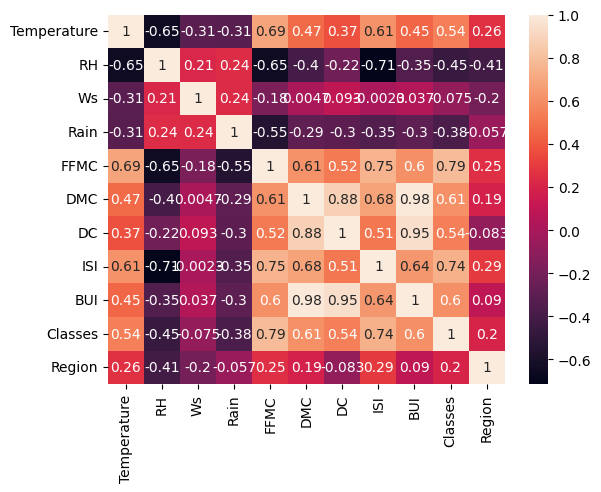

In [36]:
# ✅ Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# •	numpy, pandas → For handling data
# •	matplotlib, seaborn → For visualization
# •	train_test_split, StandardScaler → For splitting and scaling the dataset

# 📂 Step 2: Load the Cleaned Dataset
df = pd.read_csv("Algerian_forest_fires_clean_dataset.csv")
df.head()

# | Index | Day | Month | Year | Temperature (°C) | RH (%) | Wind Speed (km/h) | Rain (mm) | FFMC | DMC | DC   | ISI | BUI | FWI | Class    | Region |
# | ----- | --- | ----- | ---- | ---------------- | ------ | ----------------- | --------- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 1   | 6     | 2012 | 29               | 57     | 18                | 0.0       | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 2   | 6     | 2012 | 29               | 61     | 13                | 1.3       | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 3   | 6     | 2012 | 26               | 82     | 22                | 13.1      | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 4   | 6     | 2012 | 25               | 89     | 13                | 2.5       | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 5   | 6     | 2012 | 27               | 77     | 16                | 0.0       | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |


# •	We're using a cleaned dataset (after preprocessing)
# •	Target column: FWI
# •	Categorical column: Classes

# 🧹 Step 3: Drop Date Columns
df.drop(['day', ' month', ' year'], axis=1, inplace=True)
df.head()
# | Index | Temperature | RH | Wind Speed | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Class    | Region |
# | ----- | ----------- | -- | ---------- | ---- | ---- | --- | ---- | --- | --- | --- | -------- | ------ |
# | 0     | 29          | 57 | 18         | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | not fire | 0      |
# | 1     | 29          | 61 | 13         | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | not fire | 0      |
# | 2     | 26          | 82 | 22         | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | not fire | 0      |
# | 3     | 25          | 89 | 13         | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | not fire | 0      |
# | 4     | 27          | 77 | 16         | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | not fire | 0      |

# •	day, month, and year aren’t useful for prediction of Temperature
# •	So, we remove them

# 🏷️ Step 4: Encode Categorical Column
# Fix column names by stripping leading/trailing spaces
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.strip().map({'not fire': 0, 'fire': 1})
print(df['Classes'].value_counts())
# Classes
# 1    137
# 0    106
# Name: count, dtype: int64
df.head()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | FWI | Classes | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | --- | ------- | ------ |
# | 0     | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0.5 | 0       | 0      |
# | 1     | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0.4 | 0       | 0      |
# | 2     | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0.1 | 0       | 0      |
# | 3     | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0.0 | 0       | 0      |
# | 4     | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0.5 | 0       | 0      |

# •	We convert Classes to binary:
# o	not fire → 0
# o	fire → 1
# •	.str.strip() handles extra spaces

# 🎯 Step 5: Define Features and Target
X = df.drop(['FWI'], axis=1)
y = df['FWI']
X.head()
# | Index | Temperature | RH | Ws | Rain | FFMC | DMC | DC   | ISI | BUI | Classes | Region |
# | ----- | ----------- | -- | -- | ---- | ---- | --- | ---- | --- | --- | ------- | ------ |
# | 0     | 29          | 57 | 18 | 0.0  | 65.7 | 3.4 | 7.6  | 1.3 | 3.4 | 0       | 0      |
# | 1     | 29          | 61 | 13 | 1.3  | 64.4 | 4.1 | 7.6  | 1.0 | 3.9 | 0       | 0      |
# | 2     | 26          | 82 | 22 | 13.1 | 47.1 | 2.5 | 7.1  | 0.3 | 2.7 | 0       | 0      |
# | 3     | 25          | 89 | 13 | 2.5  | 28.6 | 1.3 | 6.9  | 0.0 | 1.7 | 0       | 0      |
# | 4     | 27          | 77 | 16 | 0.0  | 64.8 | 3.0 | 14.2 | 1.2 | 3.9 | 0       | 0      |

y.head()
# 0    0.5
# 1    0.4
# 2    0.1
# 3    0.0
# 4    0.5
# Name: FWI, dtype: float64

# •	X = all input features
# •	y = target column → FWI

# ✂️ Step 6: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_train.shape
# ((194, 11), (49, 11), (194,), (194,))
# •	80% training
# •	20% testing
# •	Ensures our model is evaluated on unseen data

X_train.corr()
# |                 | Temperature | RH    | Ws    | Rain  | FFMC  | DMC   | DC    | ISI   | BUI   | Classes | Region |
# | --------------- | ----------- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ----- | ------- | ------ |
# | **Temperature** | 1.00        | -0.65 | -0.31 | -0.31 | 0.69  | 0.47  | 0.37  | 0.61  | 0.45  | 0.54    | 0.26   |
# | **RH**          | -0.65       | 1.00  | 0.21  | 0.24  | -0.65 | -0.40 | -0.22 | -0.71 | -0.35 | -0.45   | -0.41  |
# | **Ws**          | -0.31       | 0.21  | 1.00  | 0.24  | -0.18 | 0.00  | 0.09  | -0.00 | 0.04  | -0.08   | -0.20  |
# | **Rain**        | -0.31       | 0.24  | 0.24  | 1.00  | -0.55 | -0.29 | -0.30 | -0.35 | -0.30 | -0.38   | -0.06  |
# | **FFMC**        | 0.69        | -0.65 | -0.18 | -0.55 | 1.00  | 0.61  | 0.52  | 0.75  | 0.60  | 0.79    | 0.25   |
# | **DMC**         | 0.47        | -0.40 | 0.00  | -0.29 | 0.61  | 1.00  | 0.88  | 0.68  | 0.98  | 0.61    | 0.19   |
# | **DC**          | 0.37        | -0.22 | 0.09  | -0.30 | 0.52  | 0.88  | 1.00  | 0.51  | 0.95  | 0.54    | -0.08  |
# | **ISI**         | 0.61        | -0.71 | -0.00 | -0.35 | 0.75  | 0.68  | 0.51  | 1.00  | 0.64  | 0.74    | 0.29   |
# | **BUI**         | 0.45        | -0.35 | 0.04  | -0.30 | 0.60  | 0.98  | 0.95  | 0.64  | 1.00  | 0.60    | 0.09   |
# | **Classes**     | 0.54        | -0.45 | -0.08 | -0.38 | 0.79  | 0.61  | 0.54  | 0.74  | 0.60  | 1.00    | 0.20   |
# | **Region**      | 0.26        | -0.41 | -0.20 | -0.06 | 0.25  | 0.19  | -0.08 | 0.29  | 0.09  | 0.20    | 1.00   |


# Detect multicollinearity (e.g. DMC, DC, and BUI are highly correlated).

# check the multicollinearity
corr = X_train.corr()
sns.heatmap(corr,annot=True) 

#🧪 Step 7: Check for Multicollinearity
def correlation(dataset, threshold):
    col_corr = set()   #This creates an empty set to store names of features that are highly correlated
    corr_matrix = dataset.corr() #This creates a correlation table that shows how similar each pair of features is.

    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

corr_features = correlation(X_train, 0.85)
print(corr_features)
#{'BUI', 'DC'}

# •	Detect features that are too similar (correlation > 0.85)
# •	Helps prevent overfitting

# 🧹 Step 8: Drop Correlated Features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
# •	We remove those highly correlated features
X_train.shape,X_test.shape
#((194, 9), (49, 9))

# 📏 Step 9: Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# •	Transforms data so:
# o	Mean = 0
# o	Standard Deviation = 1
# •	Essential for regularized models










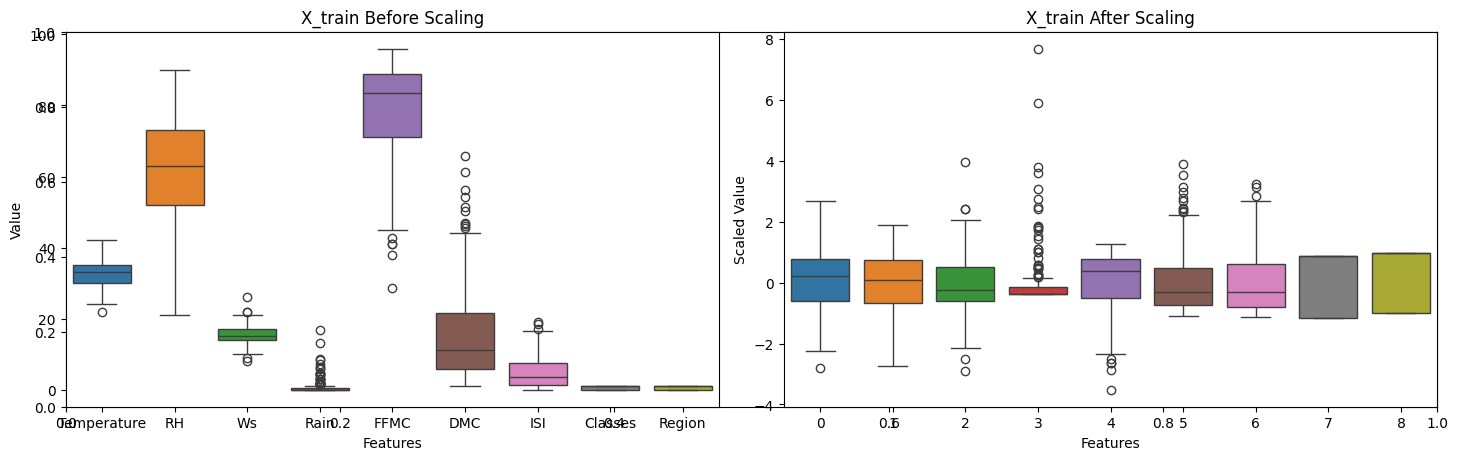

Linear Regression MAE: 0.5049978694165659
Linear Regression R2 Score: 0.9805895859259883
Lasso MAE: 1.0093958923873405
Lasso R2 Score: 0.9430507350726564


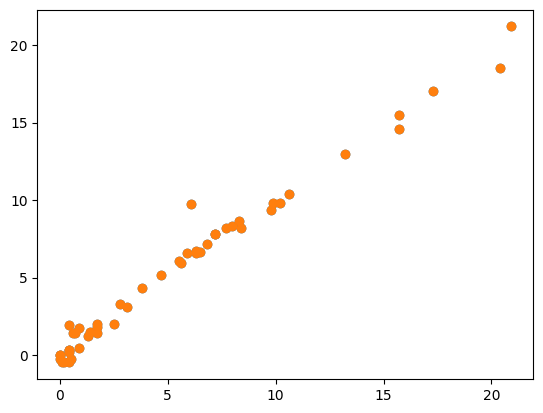

In [ ]:
# 📊 Step 10: Visualize Scaling Effect
# Create a figure with two subplots side-by-side
plt.subplots(figsize=(15, 5))
#  First subplot: Box plot of X_train before scaling
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.xlabel('Features')
plt.ylabel('Value')

# Second subplot: Box plot of X_train after scaling
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')
plt.xlabel('Features')
plt.ylabel('Scaled Value')

# Display the plots
plt.tight_layout() # Adjust subplot params for a tight layout
plt.show()
# •	Boxplots before and after scaling
# •	Helps visualize range compression
#Before scaling we can see range is between 0 to 100 with some ouitlier
# After Scaling it range -2 to 4 with outlier 

# 🧠 Model Training: Linear Regression & Lasso
# 📈 Step 11: Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression MAE:", mae)
print("Linear Regression R2 Score:", r2)
plt.scatter(y_test,y_pred)

# Linear Regression MAE: 0.5049978694165659
# Linear Regression R2 Score: 0.9805895859259883
# ✅ Results:
# •	R² Score ≈ 0.98 (great fit)
# •	MAE ≈ 0.54 (low error)






Lasso MAE: 1.0093958923873405
Lasso R2 Score: 0.9430507350726564


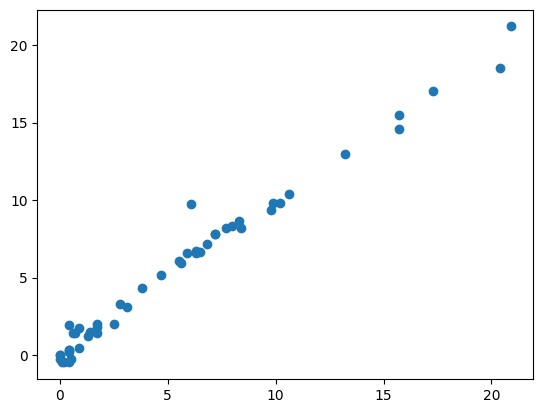

In [ ]:
# 🧮 Step 13: Lasso Regression
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1.0)
lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Lasso MAE:", mae_lasso)
print("Lasso R2 Score:", r2_lasso)
plt.scatter(y_test,y_pred)
# Lasso MAE: 1.0093958923873405
# Lasso R2 Score: 0.9430507350726564
# ✅ Results:
# •	R² Score ≈ 0.94
# •	MAE ≈ 1.13
# Why Lasso?
# •	Adds L1 penalty
# •	Can remove useless features by setting their coefficients to 0

LassoCV MAE: 0.5556715031617874
LassoCV R2 Score: 0.978328234520343


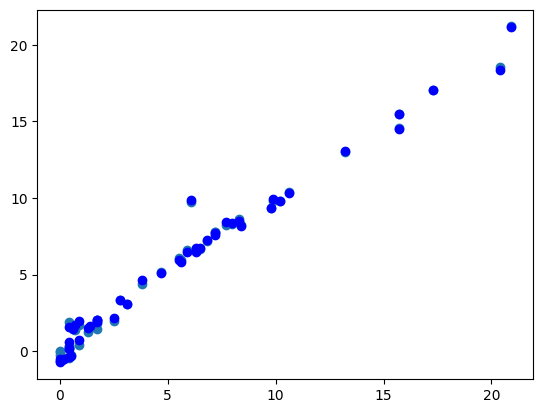

In [ ]:
# ✅ Step 15: LassoCV – Lasso with Cross-Validation
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaled, y_train)

y_pred_cv = lasso_cv.predict(X_test_scaled)

mae_cv = mean_absolute_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

print("LassoCV MAE:", mae_cv)
print("LassoCV R2 Score:", r2_cv)
plt.scatter(y_test,y_pred)
plt.scatter(y_test, y_pred_cv, color='blue')  # actual vs predicted
# LassoCV MAE: 0.5556715031617874
# LassoCV R2 Score: 0.978328234520343